# Comp 5130 Project

# K-Means Clustering

## Authors: Kevin Dong, Maci Hadley, Marshall Nelson

### Dr. Yang Zhou


#### Imports

In [231]:
import numpy as np
import matplotlib.pyplot as plt

#### Load Dataset  
We are using the simple circles dataset from UCIrvine

In [232]:
 # Define the file to open
file_path = 'circles.txt'

# Open the file and read coordinates
coordinates = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=(0, 1))

# Print out the list of coordinates
# print("Points:", coordinates)

#### Define K-Means Clustering Function
Self-Implemented without using an external k-means library

##### Process:
**initialize_centroids:** Sets Centroids to 100 random points in the dataset

**assign_clusters:** each point to the closest centroid

**update_centroid:** Sets the centroid to the center of its cluster

In [233]:
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = np.array(data[indices])
    return centroids

def assign_clusters(data, centroids):
    # Assign each point to the nearest centroid
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        clusters.append(nearest_centroid)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Calculate new centroids as the mean of assigned points
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # If a cluster has no points, reinitialize its centroid randomly
            new_centroids.append(data[np.random.choice(len(data))])
    return np.array(new_centroids)

        
            

#### Perform K-Means on the dataset  

Two Major Options.
1. Iterate through K-Means a set amount of times
2. Stop iterating after Centroids don't move within a set tolerance between iterations

In [234]:
def kmeans(data, k, max_iters=100, tol=1e-6):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged after {i+1} iterations.")
            break
        centroids = new_centroids
    return clusters, centroids

In [235]:
k = 100
clusters, centroids = kmeans(coordinates, k)
#print(centroids)
#print(clusters)

Converged after 20 iterations.


Plotting

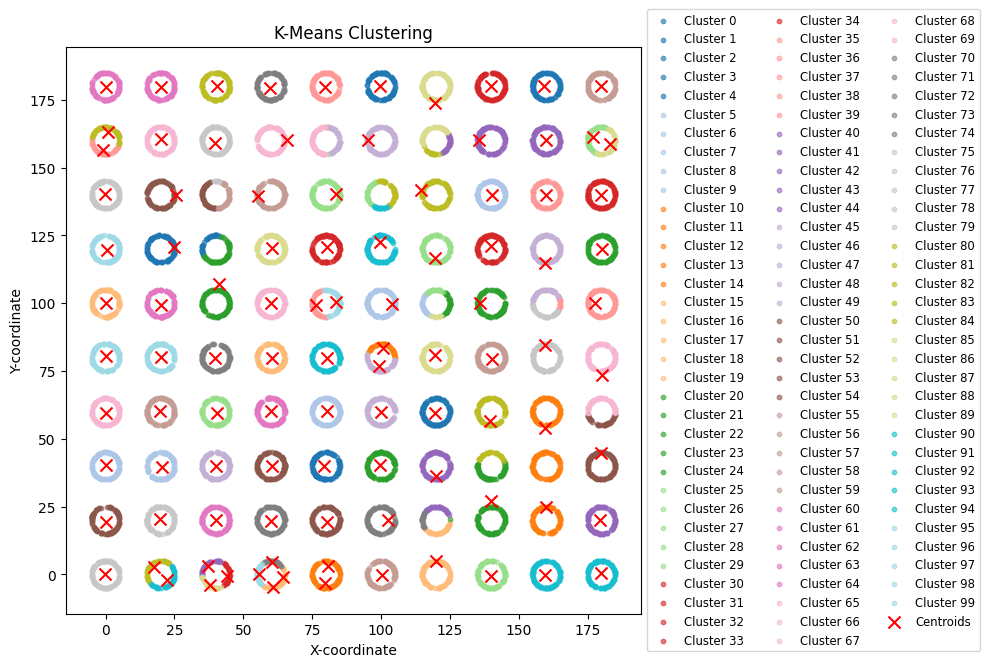

In [236]:
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(10, 7))

    #Assign unique colors to clusters
    colors = plt.get_cmap("tab20", k)

    #Plotting each cluster
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=10, color=colors(cluster_id), label=f'Cluster {cluster_id}', alpha=0.6)

    #Plotting the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=75, color='red', marker='x', label='Centroids')

    
    #Add labels and legend
    plt.title("K-Means Clustering")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")

    #Move the legend outside the plot
    plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

    plt.tight_layout()  
    plt.show()

clusters = np.array(clusters)

plot_clusters(coordinates, clusters, centroids, k)
